# Parent network with Richer Convolutional Features (RCF)

This part is the innovation part of our project. Inspired by the paper "Richer Convolutional Features for Edge
Detection" (http://openaccess.thecvf.com/content_cvpr_2017/html/Liu_Richer_Convolutional_Features_CVPR_2017_paper.html), we modify the osvos network and combine with RCF network. Then we train the modified network again and try to figure out if the results can be improved.


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
%tensorflow_version 1.13

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.13`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
tf.__version__

'1.15.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q '/content/drive/My Drive/models.zip' -d '/content'

In [ ]:
!unzip -q '/content/drive/My Drive/models_RCF.zip' -d '/content'

In [ ]:
!unzip -q '/content/drive/My Drive/DAVIS.zip' -d '/content'

replace /content/DAVIS/Annotations/1080p/bear/00000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Load Data


In [ ]:
from data_parent import load_data_parent

train_list = 'train_parent.txt'
dataset = load_data_parent(train_list, './DAVIS')

Start loading files:
Loading the data.........................................
Finish loading Dataset


### Train

In [ ]:
import os
import sys
import tensorflow as tf
slim = tf.contrib.slim

# Import OSVOS files
# root_folder = os.path.dirname(os.path.realpath('__file__'))
# sys.path.append(os.path.abspath(root_folder))
import cnn_rcf
from train_parent import train_parent_rcf


# Training parameters
gpu_id = 0
imagenet_ckpt = 'models/vgg_16.ckpt' #load vgg_16 checkpoints
logs_path = os.path.join('content', 'models_RCF', 'OSVOS_parent_RCF')
store_memory = True
data_aug = True
iter_mean_grad = 10
max_training_iters_1 = 15000
max_training_iters_2 = 30000
max_training_iters_3 = 50000
save_step = 5000
test_image = None
display_step = 100
ini_learning_rate = 1e-8
boundaries = [10000, 15000, 25000, 30000, 40000]
values = [ini_learning_rate, ini_learning_rate * 0.1, ini_learning_rate, ini_learning_rate * 0.1, ini_learning_rate,
          ini_learning_rate * 0.1]


# Train the network
with tf.Graph().as_default():
    with tf.device('/gpu:' + str(gpu_id)):
        global_step = tf.Variable(0, name='global_step', trainable=False)
        learning_rate = tf.train.piecewise_constant(global_step, boundaries, values)
        train_parent_rcf(dataset, imagenet_ckpt, 1, learning_rate, logs_path, max_training_iters_1, save_step,
                           display_step, global_step, iter_mean_grad=iter_mean_grad, test_image_path=test_image,
                           ckpt_name='OSVOS_parent_RCF')

with tf.Graph().as_default():
    with tf.device('/gpu:' + str(gpu_id)):
        global_step = tf.Variable(max_training_iters_1, name='global_step', trainable=False)
        learning_rate = tf.train.piecewise_constant(global_step, boundaries, values)
        train_parent_rcf(dataset, imagenet_ckpt, 2, learning_rate, logs_path, max_training_iters_2, save_step,
                           display_step, global_step, iter_mean_grad=iter_mean_grad, resume_training=True,
                           test_image_path=test_image, ckpt_name='OSVOS_parent_RCF')

with tf.Graph().as_default():
    with tf.device('/gpu:' + str(gpu_id)):
        global_step = tf.Variable(max_training_iters_2, name='global_step', trainable=False)
        learning_rate = tf.train.piecewise_constant(global_step, boundaries, values)
        train_parent_rcf(dataset, imagenet_ckpt, 3, learning_rate, logs_path, max_training_iters_3, save_step,
                           display_step, global_step, iter_mean_grad=iter_mean_grad, resume_training=True,
                           test_image_path=test_image, ckpt_name='OSVOS_parent_RCF')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.






Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.









Init variable



Initializing from pre-trained imagenet model...
INFO:tensorflow:Restoring parameters from models/vgg_16.ckpt


Weights initialized
Start training


2020-12-18 05:48:43.747162 Iter 100: Training Loss = 66523.7891
2020-12-18 05:50:42.130242 Iter 200: Training Loss = 216813.4062
2020-12-18 05:52:40.172415 Iter 300: Training Loss = 63721.2148
2020-12-18 05:54:38.057918 Iter 400: Training Loss = 45000.0352
2020-12-18 05:56:36.044911 Iter 500: Training Loss = 120370.1328
2020-12-18 05:58:33.873205 Iter 600: Training Loss = 84228.9766
2020-12-18 06:00:31.789813 Iter 700: Training Loss = 20929.2207
2020-12-18 06:02:29.560864 Iter 800: Training Loss = 23742.6152
2020-12-18 06:04:27.340442 Iter 900: Training Loss = 30912.9102
2020-12-18 06:06:25.035369 Iter 1000: Training Loss = 35234.6797
2020-12-18 06:08:22.692806 Iter 1100: Training Loss = 91445.0078
2020-12-18 06:10:20.367833 Iter 1200: Training Loss = 31562.7070
2020-12-18 06:12:18.094590 Iter 1300: Training Loss = 37103.5391
2020-12-18 06:14:15.801570 Iter 1400: Training Loss = 22196.6348
2020-12-18 06:16:13.513442 Iter 1500: Training Loss = 169918.5000
2020-12-18 06:18:11.192159 Iter

INFO:tensorflow:content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-5000 is not in all_model_checkpoint_paths. Manually adding it.
Model saved in file: content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-5000


2020-12-18 07:27:00.001990 Iter 5100: Training Loss = 30230.2305
2020-12-18 07:28:58.135410 Iter 5200: Training Loss = 52357.1680
2020-12-18 07:30:56.420123 Iter 5300: Training Loss = 19347.0430
2020-12-18 07:32:54.660961 Iter 5400: Training Loss = 17495.1211
2020-12-18 07:34:52.874595 Iter 5500: Training Loss = 12806.3340
2020-12-18 07:36:51.069925 Iter 5600: Training Loss = 24075.0117
2020-12-18 07:38:49.310856 Iter 5700: Training Loss = 25045.3711
2020-12-18 07:40:47.445375 Iter 5800: Training Loss = 32159.3262
2020-12-18 07:42:45.536077 Iter 5900: Training Loss = 13810.9883
2020-12-18 07:44:43.706603 Iter 6000: Training Loss = 21890.7715
2020-12-18 07:46:41.666031 Iter 6100: Training Loss = 21768.8594
2020-12-18 07:48:39.856768 Iter 6200: Training Loss = 31059.9570
2020-12-18 07:50:38.076937 Iter 6300: Training Loss = 0.4078
2020-12-18 07:52:36.106316 Iter 6400: Training Loss = 18460.1152
2020-12-18 07:54:34.476862 Iter 6500: Training Loss = 10981.9561
2020-12-18 07:56:32.802902 It

INFO:tensorflow:content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-10000 is not in all_model_checkpoint_paths. Manually adding it.


2020-12-18 09:03:25.321515 Iter 10000: Training Loss = 10981.3711


Model saved in file: content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-10000


2020-12-18 09:05:23.807530 Iter 10100: Training Loss = 0.4082
2020-12-18 09:07:21.861188 Iter 10200: Training Loss = 132695.1875
2020-12-18 09:09:19.884487 Iter 10300: Training Loss = 19231.5020
2020-12-18 09:11:17.938155 Iter 10400: Training Loss = 28603.2715
2020-12-18 09:13:16.097874 Iter 10500: Training Loss = 31253.1621
2020-12-18 09:15:14.059243 Iter 10600: Training Loss = 70058.7109
2020-12-18 09:17:12.079096 Iter 10700: Training Loss = 17759.2012
2020-12-18 09:19:10.225550 Iter 10800: Training Loss = 22018.6582
2020-12-18 09:21:08.388335 Iter 10900: Training Loss = 18712.9316
2020-12-18 09:23:06.545050 Iter 11000: Training Loss = 35053.3555
2020-12-18 09:25:04.672458 Iter 11100: Training Loss = 5339.5532
2020-12-18 09:27:02.760361 Iter 11200: Training Loss = 10663.7900
2020-12-18 09:29:00.807410 Iter 11300: Training Loss = 15582.7930
2020-12-18 09:30:58.762322 Iter 11400: Training Loss = 39783.4414
2020-12-18 09:32:56.982640 Iter 11500: Training Loss = 18586.9707
2020-12-18 09:

INFO:tensorflow:content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-15000 is not in all_model_checkpoint_paths. Manually adding it.


2020-12-18 10:41:48.287444 Iter 15000: Training Loss = 17078.5820


Model saved in file: content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-15000
Finished training.
Init variable
Initializing from previous checkpoint...
INFO:tensorflow:Restoring parameters from content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-15000
Weights initialized
Start training


2020-12-18 10:43:51.704461 Iter 15100: Training Loss = 19462.6445
2020-12-18 10:45:49.978845 Iter 15200: Training Loss = 7211.7856
2020-12-18 10:47:48.168232 Iter 15300: Training Loss = 7146.9253
2020-12-18 10:49:46.267570 Iter 15400: Training Loss = 10352.6230
2020-12-18 10:51:44.486907 Iter 15500: Training Loss = 11869.1230
2020-12-18 10:53:42.620929 Iter 15600: Training Loss = 7565.1636
2020-12-18 10:55:40.818875 Iter 15700: Training Loss = 7142.2783
2020-12-18 10:57:39.148748 Iter 15800: Training Loss = 4533.0386
2020-12-18 10:59:37.258617 Iter 15900: Training Loss = 37710.3242
2020-12-18 11:01:35.470503 Iter 16000: Training Loss = 1727.7343
2020-12-18 11:03:33.578224 Iter 16100: Training Loss = 15779.0010
2020-12-18 11:05:31.729459 Iter 16200: Training Loss = 8360.6797
2020-12-18 11:07:29.744649 Iter 16300: Training Loss = 36372.5898
2020-12-18 11:09:27.680224 Iter 16400: Training Loss = 14933.8848
2020-12-18 11:11:26.091007 Iter 16500: Training Loss = 11160.6455
2020-12-18 11:13:

INFO:tensorflow:content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-20000 is not in all_model_checkpoint_paths. Manually adding it.
Model saved in file: content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-20000


2020-12-18 12:22:19.373210 Iter 20100: Training Loss = 6763.4849
2020-12-18 12:24:17.522329 Iter 20200: Training Loss = 5924.0088
2020-12-18 12:26:15.628566 Iter 20300: Training Loss = 2307.2051
2020-12-18 12:28:13.660045 Iter 20400: Training Loss = 19506.1055
2020-12-18 12:30:11.860037 Iter 20500: Training Loss = 5182.0103
2020-12-18 12:32:09.919440 Iter 20600: Training Loss = 5159.8677
2020-12-18 12:34:08.003479 Iter 20700: Training Loss = 7936.1069
2020-12-18 12:36:06.084008 Iter 20800: Training Loss = 9200.1328
2020-12-18 12:38:04.048359 Iter 20900: Training Loss = 23395.3164
2020-12-18 12:40:02.057554 Iter 21000: Training Loss = 23488.3633
2020-12-18 12:41:59.976868 Iter 21100: Training Loss = 8373.6592
2020-12-18 12:43:57.926493 Iter 21200: Training Loss = 7660.5640
2020-12-18 12:45:55.924342 Iter 21300: Training Loss = 7520.7163
2020-12-18 12:47:53.822902 Iter 21400: Training Loss = 11677.8203
2020-12-18 12:49:51.630297 Iter 21500: Training Loss = 21221.8809
2020-12-18 12:51:49.

INFO:tensorflow:content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-25000 is not in all_model_checkpoint_paths. Manually adding it.


2020-12-18 13:58:33.938394 Iter 25000: Training Loss = 4138.3374


Model saved in file: content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-25000


2020-12-18 14:00:32.203701 Iter 25100: Training Loss = 5396.1182
2020-12-18 14:02:30.179783 Iter 25200: Training Loss = 17994.4980
2020-12-18 14:04:28.165927 Iter 25300: Training Loss = 2320.8354
2020-12-18 14:06:26.135405 Iter 25400: Training Loss = 8587.7686
2020-12-18 14:08:24.131829 Iter 25500: Training Loss = 7006.6895
2020-12-18 14:10:22.094070 Iter 25600: Training Loss = 14222.6680
2020-12-18 14:12:19.992511 Iter 25700: Training Loss = 18860.3066
2020-12-18 14:14:17.951099 Iter 25800: Training Loss = 18525.5020
2020-12-18 14:16:15.880363 Iter 25900: Training Loss = 3005.1140
2020-12-18 14:18:13.901312 Iter 26000: Training Loss = 7079.5273
2020-12-18 14:20:11.928556 Iter 26100: Training Loss = 7423.5859
2020-12-18 14:22:09.964145 Iter 26200: Training Loss = 22386.3164
2020-12-18 14:24:08.020743 Iter 26300: Training Loss = 18604.8965
2020-12-18 14:26:06.113847 Iter 26400: Training Loss = 6730.8457
2020-12-18 14:28:04.270787 Iter 26500: Training Loss = 3759.9424
2020-12-18 14:30:02

INFO:tensorflow:content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-30000 is not in all_model_checkpoint_paths. Manually adding it.


2020-12-18 15:36:48.645421 Iter 30000: Training Loss = 12466.3086


Model saved in file: content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-30000
Finished training.
Init variable
Initializing from previous checkpoint...
INFO:tensorflow:Restoring parameters from content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-30000
Weights initialized
Start training


2020-12-18 15:38:47.684309 Iter 30100: Training Loss = 731.6849
2020-12-18 15:40:42.728238 Iter 30200: Training Loss = 1422.2896
2020-12-18 15:42:37.728136 Iter 30300: Training Loss = 532.1700
2020-12-18 15:44:32.752931 Iter 30400: Training Loss = 307.2309
2020-12-18 15:46:27.832473 Iter 30500: Training Loss = 414.6006
2020-12-18 15:48:22.773709 Iter 30600: Training Loss = 37.3606
2020-12-18 15:50:17.773638 Iter 30700: Training Loss = 949.6259
2020-12-18 15:52:12.753943 Iter 30800: Training Loss = 416.3413
2020-12-18 15:54:07.985281 Iter 30900: Training Loss = 647.4686
2020-12-18 15:56:02.962485 Iter 31000: Training Loss = 104.5769
2020-12-18 15:57:58.054888 Iter 31100: Training Loss = 1029.4451
2020-12-18 15:59:53.180831 Iter 31200: Training Loss = 1612.3921
2020-12-18 16:01:48.232742 Iter 31300: Training Loss = 799.1579
2020-12-18 16:03:43.309245 Iter 31400: Training Loss = 32.0367
2020-12-18 16:05:38.271472 Iter 31500: Training Loss = 1674.4541
2020-12-18 16:07:33.297079 Iter 31600:

INFO:tensorflow:content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-35000 is not in all_model_checkpoint_paths. Manually adding it.
Model saved in file: content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-35000


2020-12-18 17:14:39.182350 Iter 35100: Training Loss = 449.6596
2020-12-18 17:16:34.139140 Iter 35200: Training Loss = 554.9862
2020-12-18 17:18:29.147016 Iter 35300: Training Loss = 1243.2557
2020-12-18 17:20:24.181667 Iter 35400: Training Loss = 1065.0289
2020-12-18 17:22:19.253876 Iter 35500: Training Loss = 792.4406
2020-12-18 17:24:14.231930 Iter 35600: Training Loss = 1290.4519
2020-12-18 17:26:09.237951 Iter 35700: Training Loss = 1595.5593
2020-12-18 17:28:04.182524 Iter 35800: Training Loss = 2345.1455
2020-12-18 17:29:59.199008 Iter 35900: Training Loss = 281.5561
2020-12-18 17:31:54.202665 Iter 36000: Training Loss = 1739.1865
2020-12-18 17:33:49.154956 Iter 36100: Training Loss = 746.5839
2020-12-18 17:35:44.343565 Iter 36200: Training Loss = 1320.8351
2020-12-18 17:37:39.295497 Iter 36300: Training Loss = 1389.0209
2020-12-18 17:39:34.272248 Iter 36400: Training Loss = 590.5547
2020-12-18 17:41:29.362268 Iter 36500: Training Loss = 431.1756
2020-12-18 17:43:24.446124 Iter 

INFO:tensorflow:content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-40000 is not in all_model_checkpoint_paths. Manually adding it.


2020-12-18 18:48:43.223368 Iter 40000: Training Loss = 148.8218


Model saved in file: content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-40000


2020-12-18 18:50:38.621754 Iter 40100: Training Loss = 249.0879
2020-12-18 18:52:33.796214 Iter 40200: Training Loss = 698.0654
2020-12-18 18:54:28.856287 Iter 40300: Training Loss = 572.7327
2020-12-18 18:56:24.008570 Iter 40400: Training Loss = 1011.0950
2020-12-18 18:58:19.161501 Iter 40500: Training Loss = 1520.8929
2020-12-18 19:00:14.299515 Iter 40600: Training Loss = 6232.4258
2020-12-18 19:02:09.414957 Iter 40700: Training Loss = 7.2482
2020-12-18 19:04:04.572261 Iter 40800: Training Loss = 429.0446
2020-12-18 19:05:59.666340 Iter 40900: Training Loss = 775.2326
2020-12-18 19:07:54.795154 Iter 41000: Training Loss = 438.3023
2020-12-18 19:09:49.888781 Iter 41100: Training Loss = 1430.8616
2020-12-18 19:11:45.007214 Iter 41200: Training Loss = 1013.1887
2020-12-18 19:13:40.150984 Iter 41300: Training Loss = 830.2219
2020-12-18 19:15:35.212006 Iter 41400: Training Loss = 142.5878
2020-12-18 19:17:30.319775 Iter 41500: Training Loss = 431.5540
2020-12-18 19:19:25.423504 Iter 41600

INFO:tensorflow:content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-45000 is not in all_model_checkpoint_paths. Manually adding it.


2020-12-18 20:24:39.295028 Iter 45000: Training Loss = 1290.9148


Model saved in file: content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-45000


2020-12-18 20:26:34.767074 Iter 45100: Training Loss = 217.3346
2020-12-18 20:28:29.902396 Iter 45200: Training Loss = 2492.2896
2020-12-18 20:30:24.928832 Iter 45300: Training Loss = 234.0148
2020-12-18 20:32:20.009570 Iter 45400: Training Loss = 1478.4635
2020-12-18 20:34:15.119217 Iter 45500: Training Loss = 2100.0249
2020-12-18 20:36:10.269100 Iter 45600: Training Loss = 248.0195
2020-12-18 20:38:05.320989 Iter 45700: Training Loss = 1858.0283
2020-12-18 20:40:00.445184 Iter 45800: Training Loss = 574.8907
2020-12-18 20:41:55.586033 Iter 45900: Training Loss = 208.5442
2020-12-18 20:43:50.674082 Iter 46000: Training Loss = 717.4447
2020-12-18 20:45:45.775608 Iter 46100: Training Loss = 5914.0610
2020-12-18 20:47:40.916691 Iter 46200: Training Loss = 1937.9744
2020-12-18 20:49:36.034355 Iter 46300: Training Loss = 1219.6772
2020-12-18 20:51:31.159195 Iter 46400: Training Loss = 1083.9368
2020-12-18 20:53:26.267564 Iter 46500: Training Loss = 524.9006
2020-12-18 20:55:21.412494 Iter 

INFO:tensorflow:content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-50000 is not in all_model_checkpoint_paths. Manually adding it.


2020-12-18 22:00:34.496481 Iter 50000: Training Loss = 0.4087


Model saved in file: content/models_RCF/OSVOS_parent_RCF/OSVOS_parent_RCF.ckpt-50000
Finished training.


### Tensorboard Graph

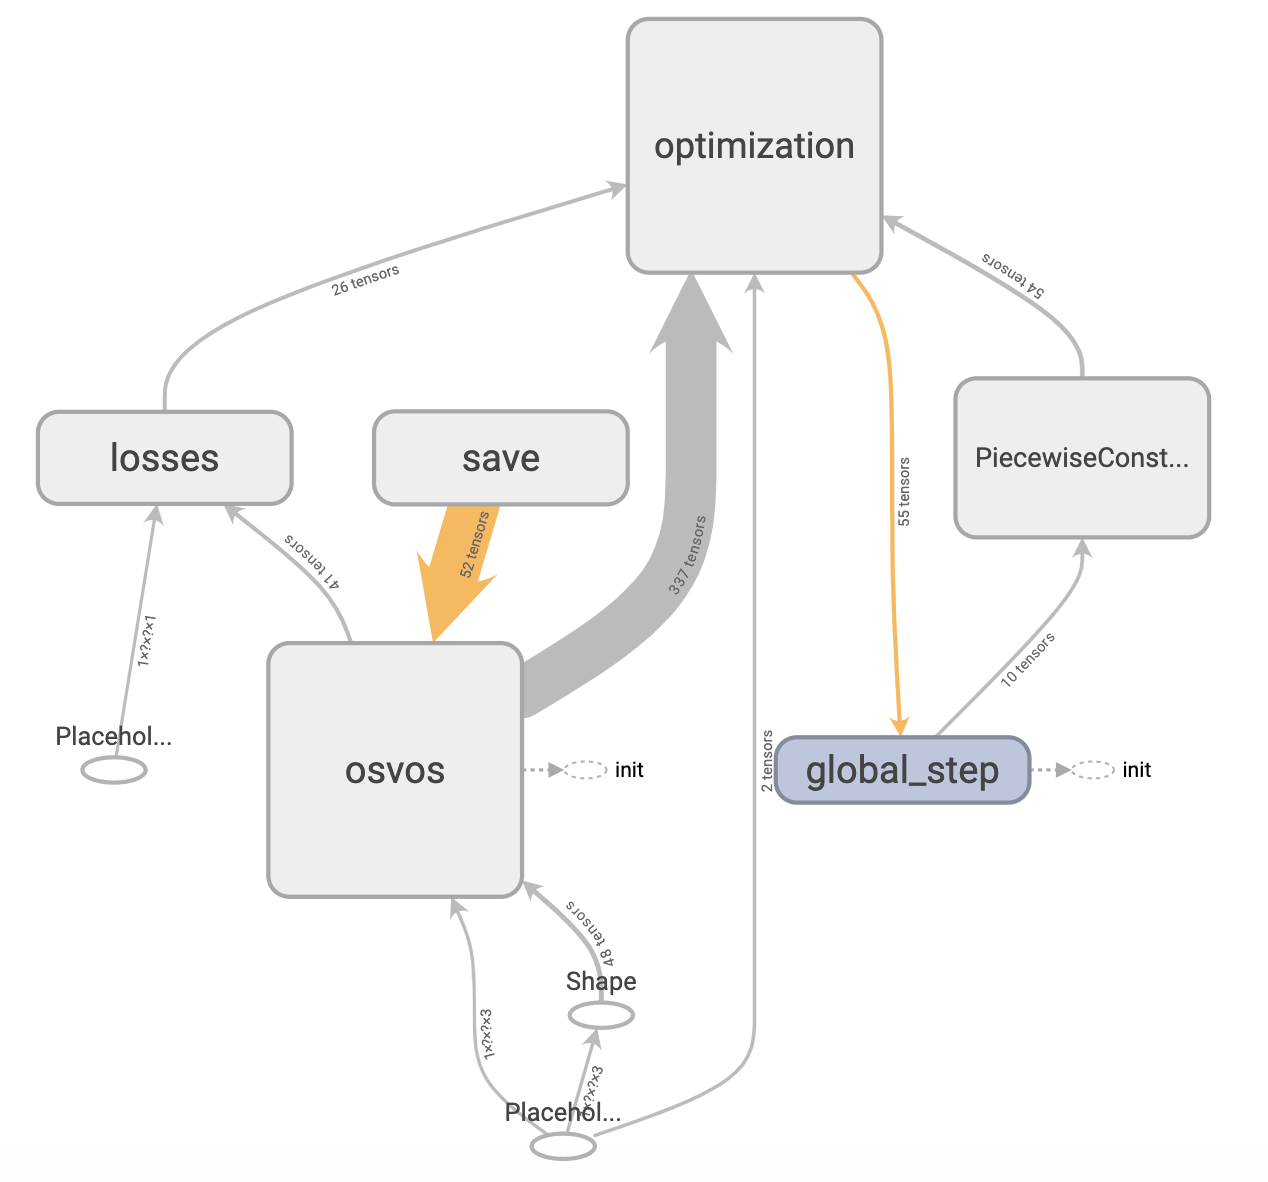

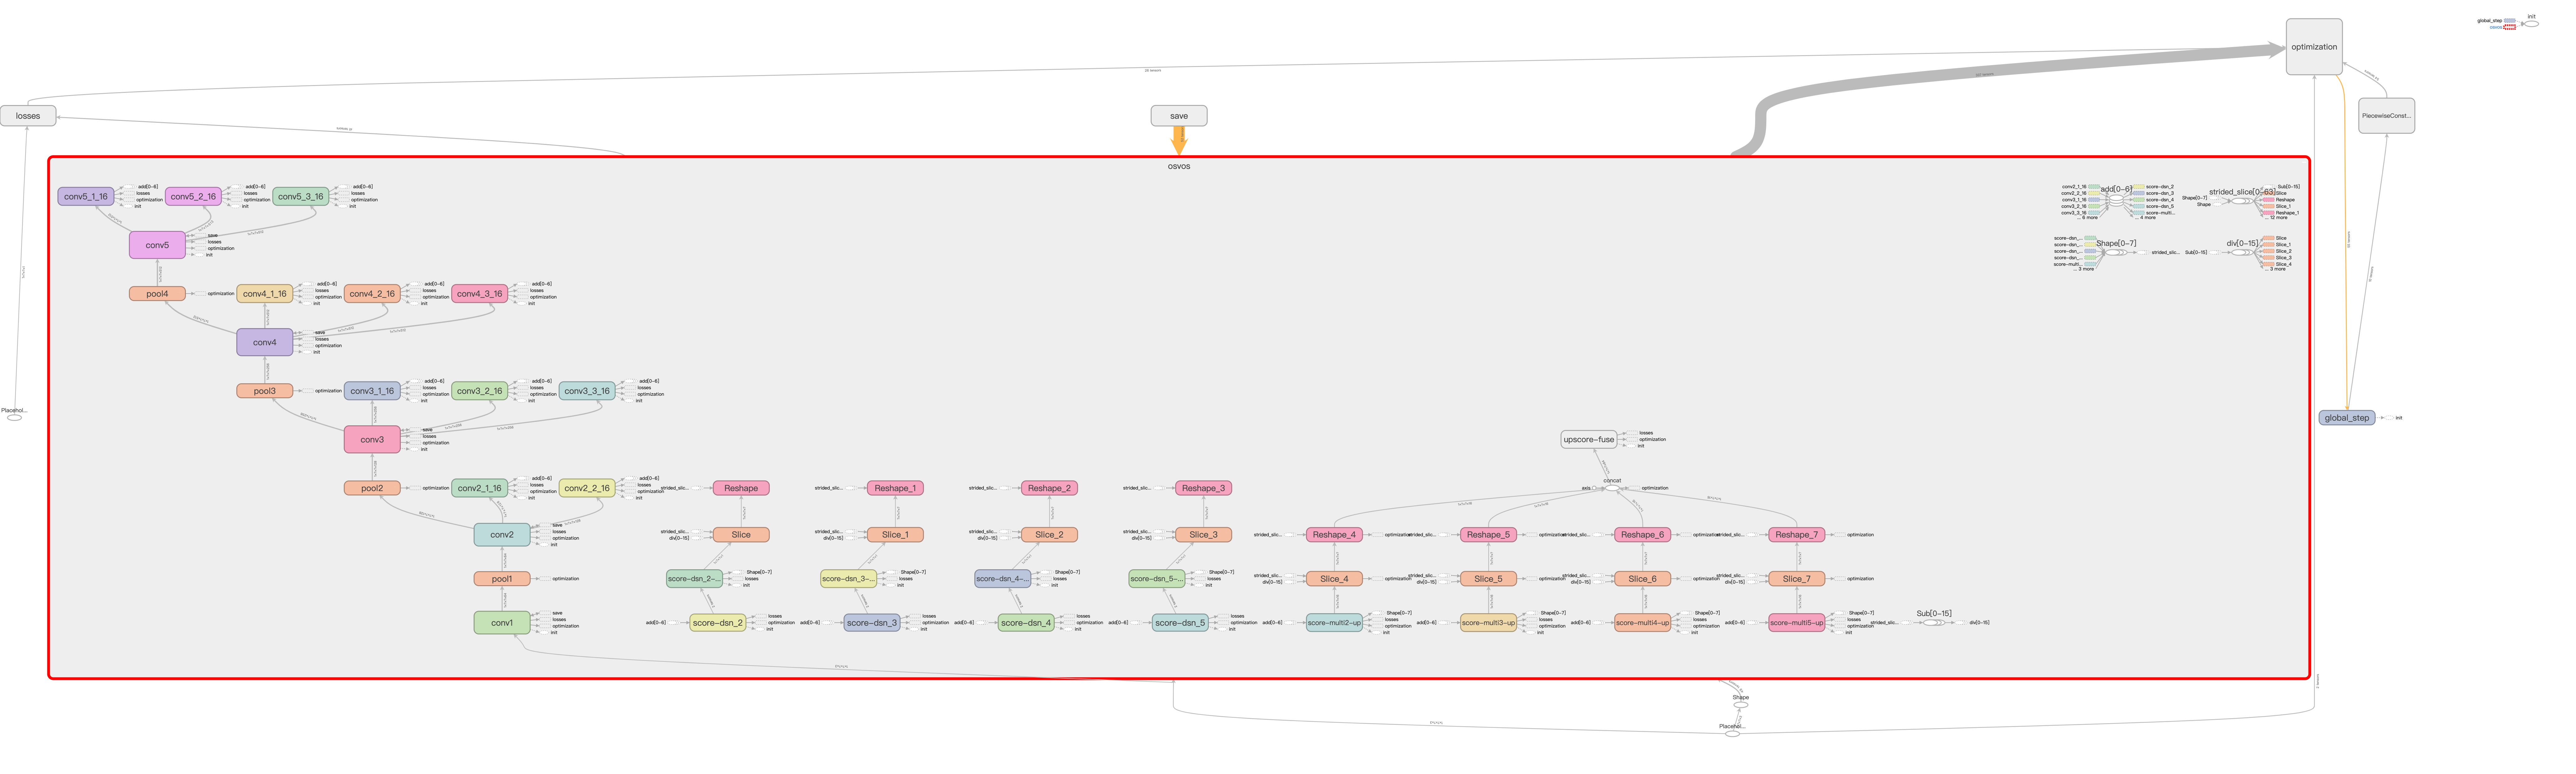

### Loss

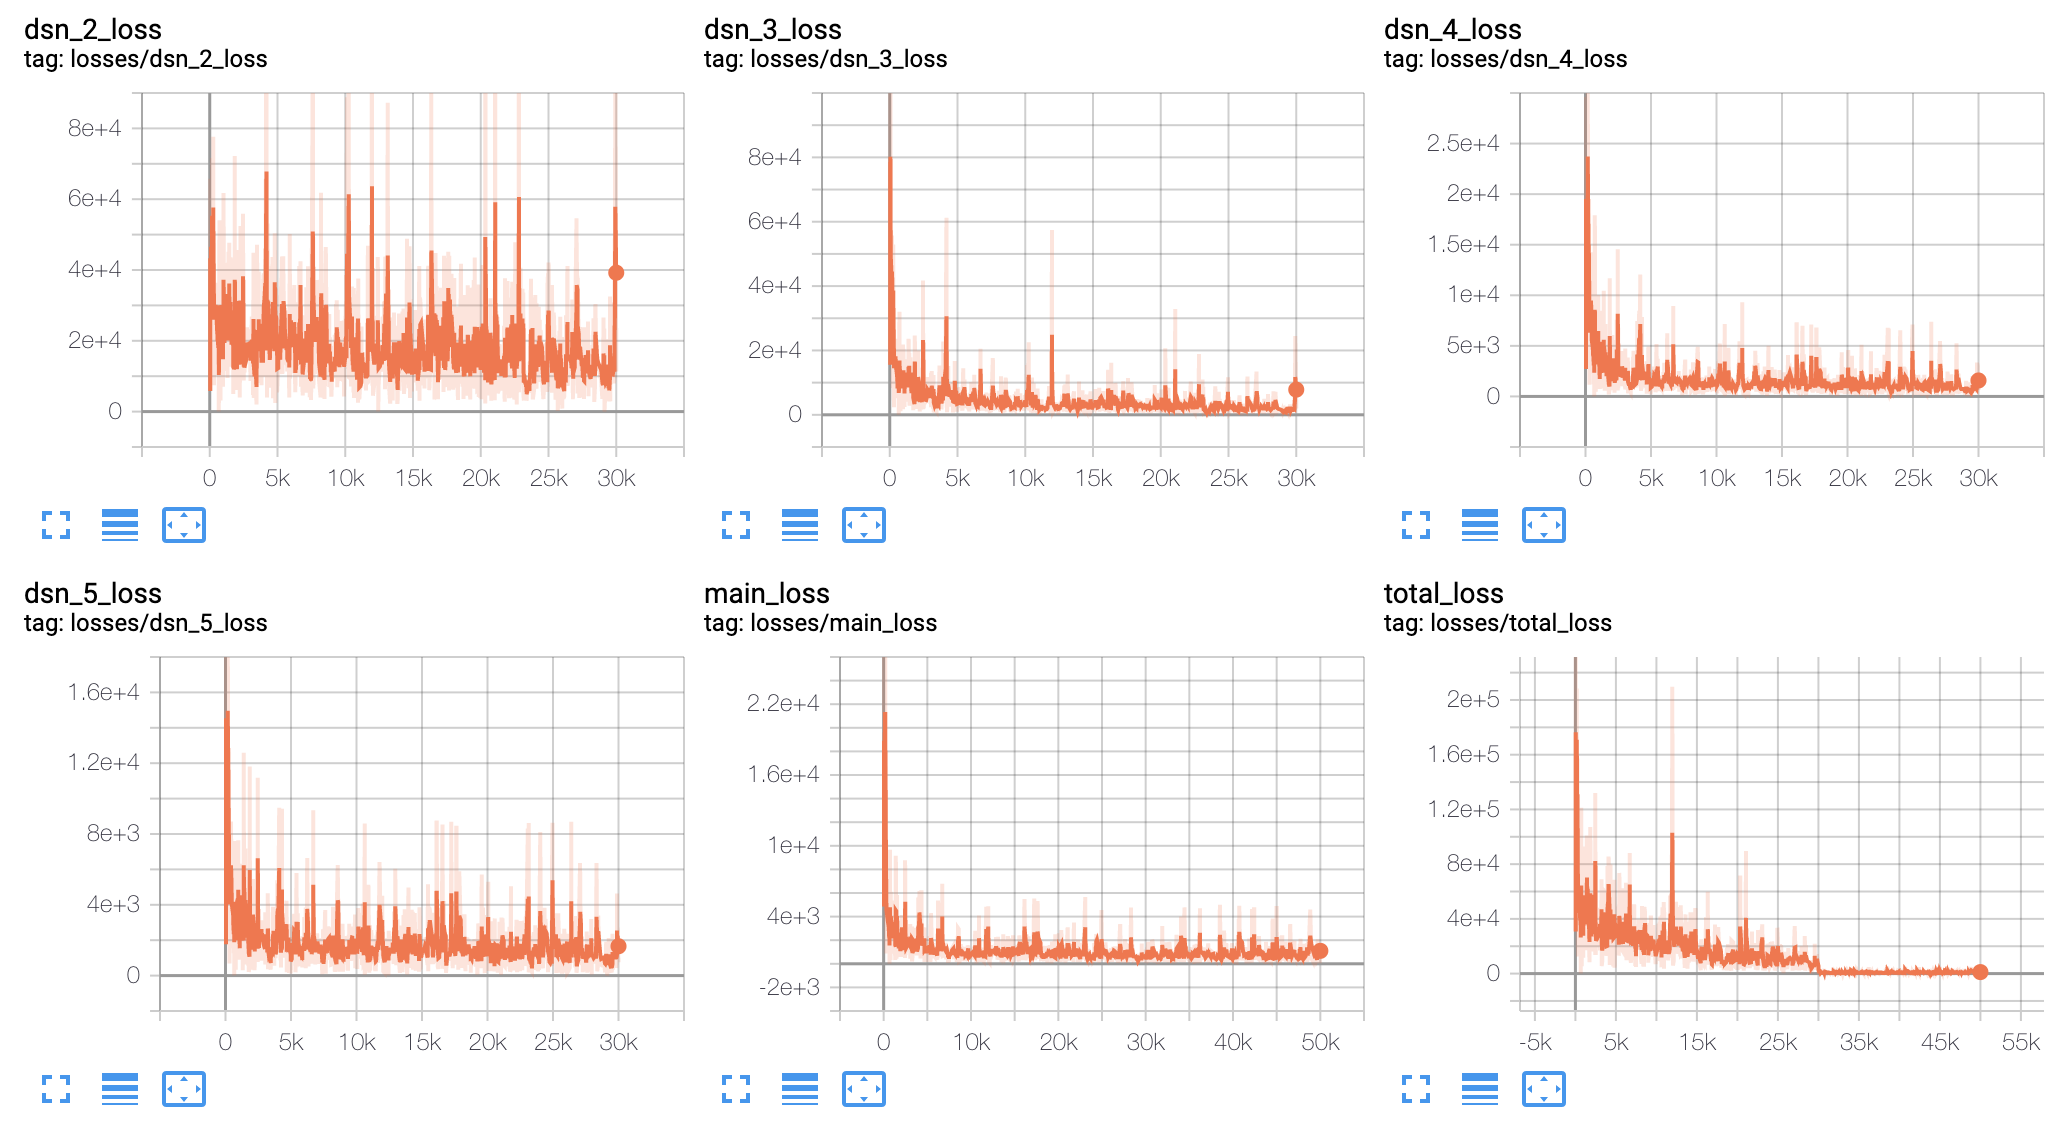